In [19]:
from geometry import *
import numpy as np
import pypower
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

def make_power(X,w):
    A = np.array([[ 0, 0, 1],
                  [ 0, 0,-1],
                  [ 0, 1, 0],
                  [ 0,-1, 0],
                  [ 1, 0, 0],
                  [-1, 0, 0]])
    b = np.array([100,0,1,1,1,1])
    return pypower.power_diagram(X,w,A,b)

# X=(x,y,z) is above the graph of (x,y) -> sqrt(|(x,y)-p|^2 + beta**2) + b_i
# <=> z >= sqrt((x-px)^2 + (y-py)^2 + beta**2) + b_i
# <=> (z-b_i)^2 >= (x-px)^2 + (y-py)^2 + beta**2 (AND z>=b_i...)
# <=> <Q(X-R)|(X-R)> - beta**2 >= 0
# with Q = diag(-1,-1,1), R = (px,py,bi)
# <=> <QX|X> + 2<QR|X> + <QR|R> - beta**2 >= 0

def make_hyperboloid(p, b, beta):
    Q = np.diag([-1,-1,1])
    R = np.array([p[0],p[1],b])
    b = 2*Q@R,
    c = np.dot(Q@R,R) - beta**2
    return Quadric(Q,b,c)


def make_laguerre(Y, psi, beta, N=20):
    assert(all(psi > 0))
    N = len(Y)
    X = np.zeros((N,3))
    X[:,0:2] = -Y
    X[:,2] = psi
    w = 2*(Y[:,0]**2 + Y[:,1]**2)

    cells = make_power(X,w)
    curves = []
    for i in range(N):
        quad = make_hyperboloid(Y[i], psi[i], beta)
        c = intersect_cell_with_quadric(X,cells[i],quad,20)
        curves.append(c)
    return curves

def plot_laguerre(allcurves):
    area = 0
    for curves in allcurves:
        for j,curvesj in curves.items():
            for crv in curvesj:
                crv = np.array(crv)
                for i in range(crv.shape[0]-1):
                    a = crv[i,0:2]
                    b = crv[i+1,0:2]
                    area += np.linalg.det(np.array([a,b]))/2
                plt.plot(crv[:,0], crv[:,1], 'k')
    return area


In [20]:
quad = make_hyperboloid(np.array([0,0]),0,1)
Z = np.linspace(-20,20)
for z in Z:
    print(quad(np.array([-1,-1,z])))

[397.]
[365.01332778]
[334.35943357]
[305.03831737]
[277.04997918]
[250.39441899]
[225.07163682]
[201.08163265]
[178.4244065]
[157.09995835]
[137.10828821]
[118.44939608]
[101.12328197]
[85.12994586]
[70.46938776]
[57.14160766]
[45.14660558]
[34.48438151]
[25.15493544]
[17.15826739]
[10.49437734]
[5.16326531]
[1.16493128]
[-1.50062474]
[-2.83340275]
[-2.83340275]
[-1.50062474]
[1.16493128]
[5.16326531]
[10.49437734]
[17.15826739]
[25.15493544]
[34.48438151]
[45.14660558]
[57.14160766]
[70.46938776]
[85.12994586]
[101.12328197]
[118.44939608]
[137.10828821]
[157.09995835]
[178.4244065]
[201.08163265]
[225.07163682]
[250.39441899]
[277.04997918]
[305.03831737]
[334.35943357]
[365.01332778]
[397.]


found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above


3.9998644771299636

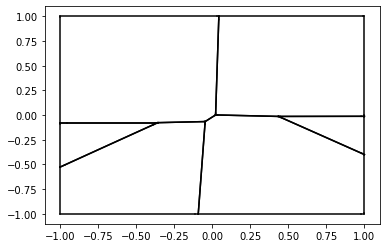

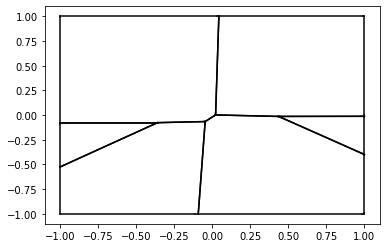

In [33]:
N = 1000
Y = 2*(np.random.rand(N,2)-.5)
psi = 0*np.ones(N)  + 0.001*np.random.rand(N)
beta = 1
curves = make_laguerre(Y, psi, beta)

plt.figure()
plot_laguerre(curves)


psi += 0.1
beta = 1
curves = make_laguerre(Y, psi, beta)
plt.figure()
plot_laguerre(curves)

found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above
found no point above


1.4802983352111525

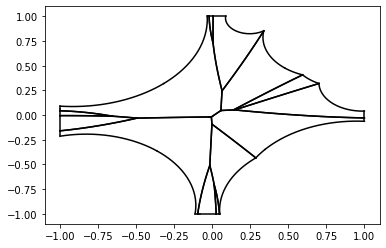

In [30]:
beta = 1
psi = np.sqrt(Y[:,0]**2 + Y[:,1]**2)
curves = make_laguerre(Y, psi, beta)
plt.figure()
plot_laguerre(curves)

In [ ]:
def area_of_cell(curves):
    if curves is None:
        return 0.0
    area = 0.0
    # compute area of cell i by integrating over the boundary
    # j is the number of the adjacent cell (negative number if adjacency 
    # is with the boundary)
    for j,curvesj in curves.items():
        for crv in curvesj:
            crv = np.array(crv)
            for k in range(crv.shape[0]-1):
                a = crv[k,0:2]
                b = crv[k+1,0:2]
                area += np.linalg.det(np.array([a,b]))/2
    return area

def areas_of_power_diagram_quadric_intersection(X,w,quad):
    cells = pypower.power_diagram(X,w)
    areas = [area_of_cell(intersect_cell_with_quadric(X,c,quad,20)) for c in cells]
    return np.array(areas)
 
N = 10
quad = Quadric(np.diag([-1,-1,0]), np.array([0,0,1]), 1)
X = np.random.rand(N,3)
w = np.zeros(N)
H = lambda w: areas_of_power_diagram_quadric_intersection(X,w,quad)
H(w)

In [ ]:

def enlarge(x):
    z = np.zeros(len(x)+1)
    z[1:] = x
    return z
x = opt.fsolve(lambda x: (H(enlarge(x)) - 4/N)[1:], np.zeros(N-1))
w = enlarge(x)

In [ ]:
# Oliker-Prussner
N = 10
X = np.random.rand(N,3)
w = np.zeros(N)
w[0] = 5
delta = 0.35
nu = 4*np.ones(N)/N

def H(w):
    return areas_of_power_diagram_quadric_intersection(X,w,quad)
def Hi(w,i):
    cells = pypower.power_diagram(X,w)
    return area_of_cell(intersect_cell_with_quadric(X,cells[i],quad,20))
def e(i):
    x = np.zeros(N)
    x[i] = 1
    return x
    
while delta>0.01:
    print("delta={}".format(delta))
    good = False
    while not good:
        good = True
        t = np.zeros(N)
        for i in range(1,N):
            if Hi(w,i) >= nu[i] - delta:
                continue
            f = lambda s: Hi(w+s*e(i),i) - nu[i]
            # cell i does not have enough mass: we need to increase w
            t[i] = opt.root_scalar(f, bracket=[0,10]).root
            good = False
        print(np.linalg.norm(H(w) - 4/N))
        w = w + t
    delta /= 2

In [ ]:
# check (visually) the computation of the intersection between a triangle and a quadric

def trisample(A, B, C,N):
    r1 = np.random.rand(N)
    r2 = np.random.rand(N)
    s1 = np.sqrt(r1)

    X = np.zeros((N,3))
    X[:,0] = A[0] * (1.0 - s1) + B[0] * (1.0 - r2) * s1 + C[0] * r2 * s1
    X[:,1] = A[1] * (1.0 - s1) + B[1] * (1.0 - r2) * s1 + C[1] * r2 * s1
    X[:,2] = A[2] * (1.0 - s1) + B[2] * (1.0 - r2) * s1 + C[2] * r2 * s1
    return X


def test_triangle():
    above = np.array([0,0,2])
    quad = make_quad(np.array([0,0]),0,1)
    v = np.random.rand(3)
    w = np.random.rand(3)
    
    X = trisample(above,v,w,1000)
    s = np.array([quad(x) for x in X]).flatten()
    plt.plot(X[s>0,0], X[s>0,1],'.r')
    plt.plot(X[s<0,0], X[s<0,1],'.b')

    curves = intersect_triangle_with_quadric(quad, v, w, above)
    for c in curves:
        plt.plot(c[:,0], c[:,1],'g', linewidth=4)
        
#test_triangle()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

quad = make_quad(np.array([0,0]),0,.1)

N= 5
X = np.random.rand(N,3)
w = np.zeros(N)
cells = make_power(X,w)

area = 0
plt.figure(figsize=(10,10))
for i in range(N):
    curves = intersect_cell_with_quadric(X,cells[i],quad,30)
    if curves is None:
        print("empty cell {}".format(i))
        continue
    for j,curvesj in curves.items():
        for crv in curvesj:
            crv = np.array(crv)
            for i in range(crv.shape[0]-1):
                a = crv[i,0:2]
                b = crv[i+1,0:2]
                area += np.linalg.det(np.array([a,b]))/2
            plt.plot(crv[:,0], crv[:,1], 'k')
print(area)